In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


! pip install seaborn
import seaborn as sns



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [4]:
data =  pd.read_excel('data/Data.xlsx')
data.head()

,ID,X1,X2,X3,Z1,Z2,A,B,Y
0,1001,6.44,2.0,1.00,5,16.0,738,0.0,11.0
1,1002,0.00,0.0,0.00,4,2.0,315,0.0,0.0
2,1003,18.50,3.0,2.50,108,64.0,11415,205302.1,21.0
3,1004,4.32,1.0,0.50,0,6.0,561,0.0,7.0
4,1005,0.00,0.0,7.16,890,55.0,0,0.0,0.0


In [5]:
data_without_0 = data[data['Y'] != 0]
data_without_0.shape

(30, 9)

In [6]:
X = data_without_0.drop('Y',axis=1).reset_index(drop=True)
X.drop('ID',axis=1,inplace=True)
y = data_without_0['Y'].reset_index(drop = True)


In [7]:
X.fillna(X.mean(),inplace=True)

In [8]:
features =  list(X.columns)

# Using 2 Principal Components

 Steps:
1. Scale the data
2. INitialize random centroids
3. Label each data point
4. Update Centroids
5. Repeat Steps 3 and 4 until centroid stop changing

## Scaling using MIn Max

In [9]:
#Scaling to have values from 1 to 10
X = (X - X.min()) / (X.max() - X.min()) * 9 + 1

In [10]:
# Initializing random centroids
def random_centroids(X,k):
    centroids = []

    for i in range(k):
        centroid = X.apply(lambda x : float(x.sample())) # random centroid
        centroids.append(centroid)

    return pd.concat(centroids,axis=1)



In [11]:
# Getting labels
def get_labels(X,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((X - x) **2).sum(axis = 1)))
    return distances.idxmin(axis=1)
    
    

In [12]:
# Updating centroids
def new_centroids(X, labels,k):
    return X.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [13]:
# Function to plot the cluster in 2 - Dimension
def plot_clusters(X,labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(X)
    centroids_2d = pca.transform(centroids.T)
    
    # PCA components (loadings)
    loadings = pca.components_

    # Create a DataFrame for better visualization of feature contributions to each PC
    loadings_df = pd.DataFrame(loadings, columns=X.columns, index=[f"PC{i+1}" for i in range(loadings.shape[0])])

    
    clear_output(wait=True)
    
    plt.title(f'Iteration{iteration}')
    plt.scatter(x = data_2d[:,0], y = data_2d[:,1], c = labels)
    plt.scatter(x = centroids_2d[:,0], y = centroids_2d[:,1], c = 'red')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
    return loadings_df

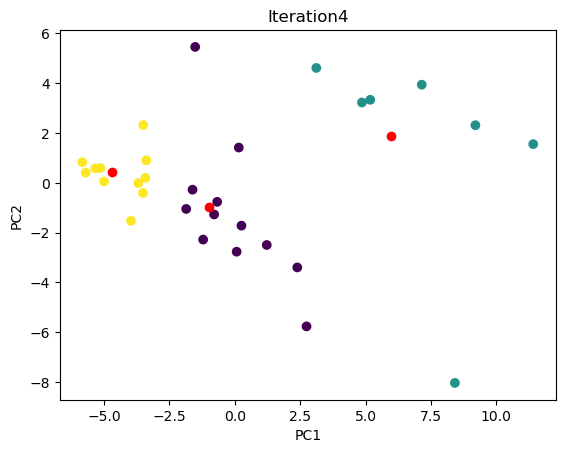

           X1        X2        X3        Z1        Z2         A         B
PC1  0.415023  0.247527  0.348335  0.331460  0.322801  0.419729  0.504885
PC2 -0.124130 -0.290689  0.539057 -0.095644 -0.534512 -0.262745  0.495603


In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

max_iterations = 100
k = 3

centroids = random_centroids(X,k)
# print(centroids)
old_centroids = pd.DataFrame()
iteration = 1

while(iteration<max_iterations) and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(X,centroids)
    # print(labels)
    # print(old_centroids)
        
    centroids = new_centroids(X, labels, k)
    # print(centroids)
    plot_clusters(X,labels,centroids, iteration)
    
    iteration += 1
print(plot_clusters(X,labels,centroids, iteration))

In [34]:
centroids

,0,1,2
X1,5.485328,6.994922,2.339497
X2,2.345901,4.322135,2.100485
X3,2.432985,5.804234,1.357923
Z1,2.833629,4.144891,1.252855
Z2,3.592918,4.131630,1.634055
A,3.430326,6.027402,1.728988
B,1.481268,7.306000,1.251380


In [35]:
X[labels==2]

,X1,X2,X3,Z1,Z2,A,B
0,2.362464,1.866635,1.195652,1.034325,1.455696,1.051478,1.000000
2,1.906877,1.433317,1.000000,1.000000,1.170886,1.000000,1.000000
5,3.664756,1.866635,1.391304,1.377574,1.142405,2.628114,2.332422
8,1.666189,2.299952,1.195652,1.075515,2.481013,1.216384,1.219359
10,3.050143,1.866635,1.586957,1.535469,2.110759,2.765099,1.264961
13,2.160458,2.299952,1.195652,1.645309,1.000000,1.330974,1.000000
14,3.127507,2.650939,1.586957,1.459954,1.313291,3.224333,1.533043
19,3.535817,2.299952,1.195652,1.501144,1.768987,3.223170,1.137980
24,3.531519,1.857968,3.934783,1.102975,1.370253,1.109355,1.766219
28,1.000000,2.299952,1.027391,1.178490,1.598101,1.193989,1.000000


## Interpreting the clusters

In [36]:
insights_data = data[data['Y'] != 0].reset_index(drop = True)

insights_data = pd.concat([insights_data,labels],axis=1)#.drop(['ID'],axis=1)
insights_data.rename(columns={insights_data.columns[-1]: 'cluster'}, inplace=True)

In [37]:
insights_data.drop(['ID'],axis=1).groupby('cluster').mean()

,X1,X2,X3,Z1,Z2,A,B,Y
cluster,,,,,,,,
0,21.627500,4.242500,5.487500,324.500000,113.909091,10172.000000,5.386035e+05,28.958333
1,28.842857,8.640000,13.455714,546.714286,133.571429,19248.857143,5.938003e+06,25.214286
2,7.134545,2.617273,1.733636,39.636364,27.727273,3738.909091,2.649542e+05,10.090909


In [38]:
insights_data[insights_data['cluster']==2]

,ID,X1,X2,X3,Z1,Z2,A,B,Y,cluster
0,1001,6.44,2.00,1.00,5,16.0,738,0.00,11.0,2
2,1004,4.32,1.00,0.50,0,6.0,561,0.00,7.0,2
5,1010,12.50,2.00,1.50,55,5.0,6159,1170743.34,5.0,2
8,1013,3.20,3.00,1.00,11,52.0,1305,192741.55,6.0,2
10,1016,9.64,2.00,2.00,78,39.0,6630,232810.02,8.0,2
13,1022,5.50,3.00,1.00,94,0.0,1699,0.00,13.0,2
14,1024,10.00,3.81,2.00,67,11.0,8209,468362.28,7.0,2
19,1030,11.90,3.00,1.00,73,27.0,8205,121236.84,28.0,2
24,1035,11.88,1.98,8.00,15,13.0,937,673244.42,10.0,2
28,1039,0.10,3.00,0.57,26,21.0,1228,0.00,4.0,2


In [407]:
insights_data.to_csv('data/data_with_clusters.csv')

# Using 3 Principal components

In [278]:
# Function to randomly initialize centroids
def random_centroids_3d(X,k):
    centroids = []

    for i in range(k):
        centroid = X.apply(lambda x : float(x.sample())) # random centroid
        centroids.append(centroid)

    return pd.concat(centroids,axis=1)

In [279]:
# Function to calculate the labels based on the nearest centroid
def get_labels_3d(X, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((X - x) **2).sum(axis = 1)))
    return distances.idxmin(axis=1)

In [280]:
# Function to calculate new centroids (mean of the data points in each cluster)
def new_centroids_3d(X, labels, k):
    return X.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [281]:
def plot_clusters_3d(X, labels, centroids, iteration):
    # print(X.shape)
    # Perform PCA to reduce data to 3 components
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    
    # print(centroids)
    # Transform centroids to PCA space
    centroids_pca = pca.transform(centroids.T)
    
    clear_output(wait=True)


    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points with labels (colors based on cluster labels)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6)

    # Plot centroids in the PCA space
    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], s=300, c='red', marker='X', label='Centroids')

    # Set labels and title
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title(f'Iteration {iteration} - 3D Clusters')

    # Show legend
    ax.legend()

    # Show plot
    plt.show()


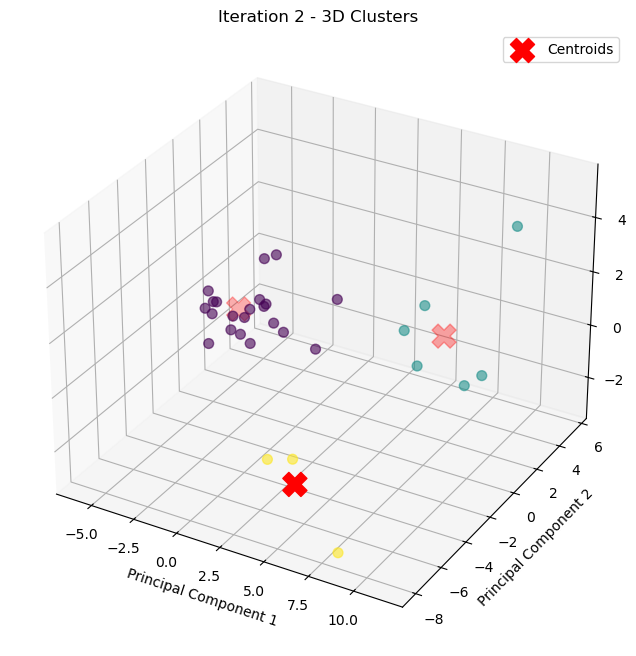

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Main loop for clustering
max_iterations = 100
k = 3


centroids = random_centroids_3d(X, k)
old_centroids = pd.DataFrame()
iteration = 1

# Clustering loop
while (iteration < max_iterations) and not np.array_equal(centroids, old_centroids):
    old_centroids = centroids
    
    # Get labels for the data points based on closest centroid
    labels = get_labels_3d(X, centroids)
    
    # Calculate new centroids based on current labels
    centroids = new_centroids_3d(X, labels, k)
    # print(X.shape)
    # Plot clusters in 3D for the current iteration
    plot_clusters_3d(X, labels, centroids, iteration)
    
    iteration += 1

In [293]:
centroids

,0,1,2
X1,3.395143,6.830188,7.880392
X2,2.012203,3.758213,7.425200
X3,1.799457,6.569436,2.470539
Z1,1.880098,3.993615,3.070504
Z2,2.286653,3.565674,6.648114
A,2.271382,5.539687,7.121103
B,1.385717,8.533797,1.588086
